# Pandas (parte 1)

Esta es la introducción a Pandas que me hubiera gustado tener.

In [1]:
import pandas as pd

## Estructuras de datos

Dos tipos de datos muy usados en Python son las listas (`list`) y los diccionarios (`dict`). Ambos son útiles para coleccionar valores de todo tipo.

In [2]:
lista = ['hidrógeno', 'helio', 'litio']

lista

['hidrógeno', 'helio', 'litio']

 Podemos referenciar un valor coleccionado utilizando el **operador índice** `[ ]`. Las listas *indexan* por posición. En Python se empieza contar desde cero, por lo tanto las posiciones también.

In [3]:
# get
lista[0]

'hidrógeno'

In [4]:
# set
lista[0] = '?'
lista

['?', 'helio', 'litio']

Los diccionarios son colecciones de pares `etiqueta:valor` e indexan por etiqueta. No es posible referenciar a un elemento por posición.

In [5]:
diccionario = {
    'H' :'hidrógeno',
    'He':'helio',
    'Li':'litio',
}

diccionario

{'H': 'hidrógeno', 'He': 'helio', 'Li': 'litio'}

In [6]:
# get
diccionario['H']

'hidrógeno'

In [7]:
# set
diccionario['Be'] = 'berilio'

diccionario

{'H': 'hidrógeno', 'He': 'helio', 'Li': 'litio', 'Be': 'berilio'}

### Pandas

Una `Series` es un objeto unidimensional, similar a una columna en una tabla. Se comporta comporta como una lista y también le asigna una etiqueta a cada elemento en la colección, comportándose como un diccionario. Por defecto, cada elemento recibirá una etiqueta que va de 0 a N-1, donde N es la longitud/tamaño de la colección.

In [8]:
# creación de una Series a partir de una lista arbitraria
pd.Series(['hidrógeno', 'helio', 'litio'])

0    hidrógeno
1        helio
2        litio
dtype: object

**Nota**: *dtype* es el tipo de los elementos de la colección. En este caso `object` hace referencia a *objetos en general*, es decir, cualquier tipo de objeto: entero (`int`), flotante (`float`), texto (`str`), etcétera. 

In [9]:
# creación de una Series especificando un índice
pd.Series(['hidrógeno', 'helio', 'litio'], index=['H', 'He', 'Li'])

H     hidrógeno
He        helio
Li        litio
dtype: object

In [10]:
# creación de una Series a partir de un diccionario (las etiquetas serán los valores del índice)
s = pd.Series({
    'H' :'hidrógeno',
    'He':'helio',
    'Li':'litio',
})

s

H     hidrógeno
He        helio
Li        litio
dtype: object

In [11]:
# obtener el índice
s.index

Index(['H', 'He', 'Li'], dtype='object')

El índice es un objeto del tipo `Index`, aportado por Pandas.

In [12]:
# obtener los elementos
s.values

array(['hidrógeno', 'helio', 'litio'], dtype=object)

Los valores se coleccionan en arreglos de NumPy (objetos del tipo `array`). Los arreglos son similares a las listas, tienen más funcionalidades.

In [13]:
# el índice se utiliza para seleccionar elementos específicos
s['H']

'hidrógeno'

In [14]:
# los valores se pueden cambiar o agregar mediante asignación como si se tratase de un diccionario
s['Be'] = 'berilio'

s

H     hidrógeno
He        helio
Li        litio
Be      berilio
dtype: object

---

Un `DataFrame` es una estructura tabular (bidimensional) compuesta por filas y columnas, similar a una hoja de cálculo, una tabla de una base de datos, o a un `data.frame` del lenguaje R.

Se puede pensar al `DataFrame` como una `Series` de `Series`: una `Series` cuyo índice son los nombres de las columnas y cuyos elementos son `Series` que se comportan como columnas. El índice de las `Series`-columna son los nombres de las filas.

In [15]:
# creación de un DataFrame a partir de una lista de listas
pd.DataFrame([
    [1, 1.008],
    [2, 4.003],
    [3, 6.941],
    [4, 9.012]
])

,0,1
0,1,1.008
1,2,4.003
2,3,6.941
3,4,9.012


In [16]:
# creación de un DataFrame especificando índice y columnas
df = pd.DataFrame(
   [[1, 1.008],
    [2, 4.003],
    [3, 6.941],
    [4, 9.012]],
    index=['H', 'He', 'Li', 'Be'],
    columns=['número_atómico', 'masa_atómica']
)

df

,número_atómico,masa_atómica
H,1,1.008
He,2,4.003
Li,3,6.941
Be,4,9.012


Otras formas de inicializar un `DataFrame`, usando:
* diccionario de listas
* diccionario de diccionarios
* lista de diccionarios

In [17]:
# obtener los nombres de las filas
df.index

Index(['H', 'He', 'Li', 'Be'], dtype='object')

In [18]:
# obtener los nombres de las columnas
df.columns

Index(['número_atómico', 'masa_atómica'], dtype='object')

In [19]:
# obtener solo los valores
df.values

array([[1.   , 1.008],
       [2.   , 4.003],
       [3.   , 6.941],
       [4.   , 9.012]])

**Nota**: Los nombres de columnas también son un índice (`Index`). Recapitulando, las `Series` tiene un índice y los `DataFrame`s tienen dos. Como Pandas piensa la tabla como una colección de columnas, para obtener un valor de una celda primero hay que acceder a la columna y luego a la fila. 

In [20]:
# podemos seleccionar una columna, obtendremos una Series
df['masa_atómica']

H     1.008
He    4.003
Li    6.941
Be    9.012
Name: masa_atómica, dtype: float64

In [21]:
# podemos cambiar o crear una columna mediante asignación, normalmente de una Series; usamos la del ejemplo anterior
df['nombre'] = s

df

,número_atómico,masa_atómica,nombre
H,1,1.008,hidrógeno
He,2,4.003,helio
Li,3,6.941,litio
Be,4,9.012,berilio


In [22]:
# porque una columna es una Series, podemos usar el índice de la Series para obtener el valor de la celda
df['masa_atómica']['He']

4.003

**Nota**: Los índices se corresponden con las dimensiones del objeto, un valor de una celda no tiene índices, por lo que es un objeto cero-dimensional, también llamado *escalar*.

## Carga de datos

Ver más: http://pandas.pydata.org/pandas-docs/stable/io.html

Pandas importa y exporta datos de y hacia gran cantidad de formatos.

#### CSV

In [23]:
df = pd.read_csv('datos/properati_básico.csv.gz')

Para exportar un `DataFrame` a un archivo CSV podemos usar

    df.to_csv('archivo.csv')

#### Excel

Requiere un paquete adicional.

    !pip install xlrd
    
Leer una hoja de cálculo.

    pd.read_excel('datos/archivo.xlsx')

#### SQL

El siguiente código muestra cómo consultar una base de datos.

```
import sqlite3

conexión = sqlite3.connect('datos/db.sqlite')
consulta = "SELECT * FROM tabla"

pd.read_sql(consulta, conexión)
```

#### BigQuery

Requiere un paquete adicional.

    !pip install pandas-gbq
    
El resto es parecido a importar desde una base de datos relacional.

    consulta = "SELECT * FROM tabla"
    
    pd.read_gbq(consulta, project_id='properati-data-public')

## Inspección

In [24]:
# ver primeras filas; probar tail para las últimas
df.head()

,fecha,tipo,lat,lon,precio,superficie_total,superficie_cubierta,ambientes,barrio
0,2017-11-01,departamento,-34.629118,-58.480835,275000.0,NaN,NaN,5.0,FLORESTA
1,2017-11-03,departamento,-34.627120,-58.475595,268000.0,134.0,122.0,4.0,FLORESTA
2,2017-11-03,departamento,-34.630429,-58.486193,88000.0,37.0,34.0,2.0,FLORESTA
3,2017-11-09,departamento,-34.628319,-58.479828,134900.0,70.0,70.0,3.0,FLORESTA
4,2017-11-14,departamento,-34.620887,-58.491288,69000.0,NaN,50.0,2.0,FLORESTA


El método `info` nos informa de ambos índices (filas y columnas), incluyendo cantidades. Nombres de columnas, tipos de datos, cantidades de valores no nulos, uso de memoria RAM.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24258 entries, 0 to 24257
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fecha                24258 non-null  object 
 1   tipo                 24258 non-null  object 
 2   lat                  24258 non-null  float64
 3   lon                  24258 non-null  float64
 4   precio               23141 non-null  float64
 5   superficie_total     22261 non-null  float64
 6   superficie_cubierta  22664 non-null  float64
 7   ambientes            20533 non-null  float64
 8   barrio               24258 non-null  object 
dtypes: float64(6), object(3)
memory usage: 1.7+ MB


El método `describe` muestra estadísticas básicas acerca de las columnas númericas. Aplica sobre todas las columnas númericas, incluso sobre aquellas en las que no tiene sentido hacer estadísticas (lat y lon por ejemplo).

In [26]:
df.describe()

,lat,lon,precio,superficie_total,superficie_cubierta,ambientes
count,24258.000000,24258.000000,2.314100e+04,22261.000000,22664.000000,20533.000000
mean,-34.599238,-58.436230,2.779905e+05,133.717578,137.000176,2.874056
std,0.026307,0.039340,3.611446e+05,1633.426319,2418.268251,1.690704
min,-34.695717,-58.529982,4.870050e+03,0.000000,1.000000,1.000000
25%,-34.618590,-58.464357,1.200000e+05,46.000000,41.000000,2.000000
50%,-34.598897,-58.436198,1.800000e+05,70.000000,62.000000,3.000000
75%,-34.580350,-58.403884,2.990000e+05,120.000000,104.000000,4.000000
max,-34.536066,-58.353946,1.350000e+07,184000.000000,263960.000000,38.000000


## Indexación

Por indexación nos referimos a la selección de un subconjunto de un `DataFrame` o de una `Series`. Por ahora hemos visto un uso básico de los corchetes `[ ]`, el operador índice, para acceder a columnas de un `DataFrame` y a valores de una `Series`. En el caso de las `Series` los casos de uso del operador no difieren prácticamente de lo que se puede hacer con un arreglo de NumPy, sin embargo en el caso de los `DataFrame`s se complejiza ya que permite seleccionar por filas (no lo vimos) o por columnas (sí lo vimos).

Los corchetes existen en Pandas por conveniencia para hacer algunas operaciones más simples, lo cual también traerá aparejado limitaciones. Pandas va a determinar si estamos queriendo acceder a la tabla usando el índice que se llama *index* (nombres filas) o el que se llama *columns*.

A su vez **hay dos maneras de utilizar los índices**:

* por etiqueta (como en los diccionarios),
* por posición (como en las listas).

Esta modalidad dual no está presente en los diccionarios, que no pueden ser indexados por posición, ni en las listas, que no pueden ser indexadas por etiqueta. Está presente en Pandas y nos permite acceder a los datos de la forma conveniente según el caso.

In [27]:
# un nombre columna, devuelve una Series
df['barrio'].head()

0    FLORESTA
1    FLORESTA
2    FLORESTA
3    FLORESTA
4    FLORESTA
Name: barrio, dtype: object

**No es posible obtener una sola fila** con `[ ]`, pero sí un subconjunto de filas y también un subconjunto de columnas. Antes de mostrar cómo hacerlo, introducimos tres nuevos conceptos: `slice`, lista de índices y máscara booleana.

### Cortes

Existe en Python un tipo de objeto llamado `slice`, traducido como corte o rebanada, cuyo fin es ayudar a producir sublistas a partir de listas, "cortando" una lista desde una posición inicial hasta una posición final. En realidad la lista original no es modificada sino que se devuelve una nueva, usando los elementos que ya existen en la original (los objetos no son copiados).

In [28]:
frutas = ['naranja', 'banana', 'ananá', 'durazno', 'uva']
frutas

['naranja', 'banana', 'ananá', 'durazno', 'uva']

Sabemos cómo obtener valores individuales.

In [29]:
frutas[2]

'ananá'

Supongamos que nos interesa conseguir una sublista con las tres primeras frutas, serían los elementos en las posiciones 0, 1, 2, por lo que deberíamos cortar desde 0 hasta 3 (no inclusive).

In [30]:
corte = slice(0, 3)
corte

slice(0, 3, None)

In [31]:
frutas[corte]

['naranja', 'banana', 'ananá']

Podemos obtener el mismo resultado con un atajo. Los atajos reciben el nombre de **azúcar sintáctica**, son expresiones cómodas para idiomas frecuentes, que existen en paralelo a las formas regulares del lenguaje.  

In [32]:
frutas[0:3]

['naranja', 'banana', 'ananá']

In [33]:
# si la posición inicial está ausente, se entiende que va desde el principio
frutas[:3]

['naranja', 'banana', 'ananá']

In [34]:
# si la posición final está ausente, se entiende que va hasta el final
frutas[3:]

['durazno', 'uva']

In [35]:
# esto no parece útil ahora pero lo será más adelante
frutas[:]

['naranja', 'banana', 'ananá', 'durazno', 'uva']

In [36]:
# ídem pero sin azúcar
corte = slice(None)
corte

slice(None, None, None)

In [37]:
frutas[corte]

['naranja', 'banana', 'ananá', 'durazno', 'uva']

### Listas de índices y máscaras booleanas

Los arreglos de NumPy son como las listas de Python pero con funcionalidades agregadas. Admiten indexado por posición, por corte y añaden nuevas maneras de formar sub-arreglos, mediante
* listas o rangos de posiciones,
* listas de valores booleanos, llamadas máscaras.

In [38]:
import numpy as np

frutas = np.array(['naranja', 'banana', 'ananá', 'durazno', 'uva'])
frutas

array(['naranja', 'banana', 'ananá', 'durazno', 'uva'], dtype='<U7')

#### Listas de posiciones

Supongamos que queremos obtener los elementos naranja, ananá, uva. A diferencia de las listas que solo permiten enteros o cortes, NumPy nos permite pasar una lista con las posiciones de interés.

In [39]:
# en vez de usar un escalar (int, str...) usamos una lista
frutas[[0,2,4]]

array(['naranja', 'ananá', 'uva'], dtype='<U7')

En Python existe un tipo de objeto llamado rango (`range`), que se puede crear —como casi todos los tipos de objetos en el lenguaje— utilizando una función homónima, que representa una colección de números desde un valor inicial hasta un valor final (no inclusive) utilizando un intervalo determinado. A diferencia de `slice`, los rangos pueden ser convertidos en listas.

Si se trata de un patrón regular, es mejor definir un rango antes que una lista.

In [40]:
# desde cero hasta cinco contando de a dos
rango = range(0, 5, 2)
rango

range(0, 5, 2)

In [41]:
# pueden ser convertidos en listas
list(rango)

[0, 2, 4]

In [42]:
# se obtienen los mismos resultados
frutas[rango]

array(['naranja', 'ananá', 'uva'], dtype='<U7')

#### Máscaras

**La máscara debe tener el mismo largo que el arreglo** y estar compuesta por valores booleanos (`bool`). En este caso, cinco elementos.

In [43]:
máscara = [True, False, True, False, True]

frutas[máscara]

array(['naranja', 'ananá', 'uva'], dtype='<U7')

Se filtran aquellos elementos cuya posición se corresponde con las posiciones de los valores `False` de la máscara, se seleccionan aquellos donde `True`. La máscara sirve para ocultar algunas partes y mostrar otras.

---

Podemos utilizar una lista de etiquetas para obtener un subconjunto de columnas.

In [44]:
# lista de nombres de columnas, devuelve un DataFrame
df[['barrio', 'ambientes', 'precio']].head()

,barrio,ambientes,precio
0,FLORESTA,5.0,275000.0
1,FLORESTA,4.0,268000.0
2,FLORESTA,2.0,88000.0
3,FLORESTA,3.0,134900.0
4,FLORESTA,2.0,69000.0


Podemos utilizar un corte para obtener un subconjunto de filas **por posición**.

In [45]:
df[:5]

,fecha,tipo,lat,lon,precio,superficie_total,superficie_cubierta,ambientes,barrio
0,2017-11-01,departamento,-34.629118,-58.480835,275000.0,NaN,NaN,5.0,FLORESTA
1,2017-11-03,departamento,-34.627120,-58.475595,268000.0,134.0,122.0,4.0,FLORESTA
2,2017-11-03,departamento,-34.630429,-58.486193,88000.0,37.0,34.0,2.0,FLORESTA
3,2017-11-09,departamento,-34.628319,-58.479828,134900.0,70.0,70.0,3.0,FLORESTA
4,2017-11-14,departamento,-34.620887,-58.491288,69000.0,NaN,50.0,2.0,FLORESTA


**Nota**: En muchos casos los nombres de filas van a coincidir con las posiciones de filas, ya que si no especificamos un índice, el índice por defecto que asigna Pandas a las filas va de 0 a N-1, siendo N la cantidad de filas. **Estas etiquetas coinciden con la posición**.

También podemos utilizar una máscara. Hay formas muy prácticas de generar máscaras, la que se presenta a continuación solo tiene fines demostrativos y jamás volverá a ser utilizada.

In [46]:
# la función len nos dice la cantidad de filas del DataFrame
cantidad_filas = len(df)

# usando la función np.null armamos un arreglo tan largo como la tabla, lleno de un valor especificado (False)
máscara = np.full(cantidad_filas, False)

# retocamos la máscara para recuperar solo las primeras dos filas
máscara[0] = True
máscara[1] = True

df[máscara]

,fecha,tipo,lat,lon,precio,superficie_total,superficie_cubierta,ambientes,barrio
0,2017-11-01,departamento,-34.629118,-58.480835,275000.0,NaN,NaN,5.0,FLORESTA
1,2017-11-03,departamento,-34.627120,-58.475595,268000.0,134.0,122.0,4.0,FLORESTA


Resumimos las capacidades de `[ ]`:
* Una etiqueta de columna, devuelve una columna.
* Una lista de etiquetas de columnas, devuelve una subtabla.
* Un corte de posiciones de filas, devuelve una subtabla.
* Una máscara de posiciones de filas, devuelve una subtabla.

Se nota el comportamiento de filas por sus posiciones y columnas por sus etiquetas.

Alternativamente se puede acceder a una columna como si fuera un atributo del `DataFrame`.

In [47]:
# funciona como df['barrio']; es como df$barrio en R
df.barrio.head()

0    FLORESTA
1    FLORESTA
2    FLORESTA
3    FLORESTA
4    FLORESTA
Name: barrio, dtype: object

### Filas y columnas

¿Qué pasa si queremos filtrar utilizando ambos índices simultáneamente? En principio podríamos hacer

    df[columnas][filas]

sin embargo esta manera efectúa dos selecciones, una seguida de la otra, no es simultánea, lo que traerá más adelante implicancias para la asignación. Para esta situación Pandas provee las siguientes formas de indexar.

* `loc[filas, columnas]` para acceder por etiquetas,
* `iloc[filas, columnas]` para acceder por posición.

Es un poco confuso al principio, la i de `iloc` hace pensar en la fila (o en la columna) número i, o sea en la posición i.

La limitación de estas formas es que **no es posible mezclar etiquetas con posiciones**; por ejemplo posición de filas y etiquetas de columnas, una combinación bastante deseable.

In [48]:
# esta línea de código desordena las filas para que sus etiquetas ya no coincidan con
# el orden que las filas tienen en la tabla (no hace falta entender esta línea en este momento);
# el método sample sirve para obtener una muestra al azar de filas 
df = df.sample(frac=1, random_state=42)

df.head()

,fecha,tipo,lat,lon,precio,superficie_total,superficie_cubierta,ambientes,barrio
19411,2018-02-23,ph,-34.640644,-58.500677,128000.0,65.0,60.0,NaN,VILLA LURO
17819,2018-02-28,departamento,-34.643719,-58.372644,86000.0,34.0,32.0,1.0,BARRACAS
14611,2018-02-07,departamento,-34.573595,-58.442591,194150.0,58.0,48.0,2.0,COLEGIALES
22362,2018-02-20,casa,-34.611046,-58.503044,245000.0,112.0,112.0,2.0,VILLA DEVOTO
16962,2018-04-11,departamento,-34.605809,-58.453481,142900.0,47.0,40.0,2.0,VILLA CRESPO


#### Por etiquetas

In [49]:
# valor de una celda, fila y columna; devuelve un escalar (valor suelto)
df.loc[100, 'fecha']

'2018-02-21'

La selección de todas las columnas en R se logra con `df[filas,]` pero en Python esta sintaxis no es válida, opciones son `df.loc[filas]` o `df.loc[filas, :]`. 

In [50]:
# un fila puntual, todas las columnas; devuelve una Series
df.loc[100]

fecha                    2018-02-21
tipo                   departamento
lat                         -34.629
lon                        -58.4797
precio                        92000
superficie_total                 48
superficie_cubierta              48
ambientes                         3
barrio                     FLORESTA
Name: 100, dtype: object

In [51]:
# varias filas (lista de etiquetas), una columna; devuelve una Series
df.loc[[1,10,100], 'fecha']

1      2017-11-03
10     2017-11-29
100    2018-02-21
Name: fecha, dtype: object

In [52]:
# varias filas, varias columnas; devuelve un DataFrame
df.loc[[1,10,100], ['superficie_cubierta', 'superficie_total']]

,superficie_cubierta,superficie_total
1,122.0,134.0
10,341.0,401.0
100,48.0,48.0


La selección de todas las filas en R se logra con `df[,columnas]` pero en Python esta sintáxis no es válida, se requiere de un corte total `slice(None)` o más común, su azúcar sintáctica `df.loc[:, columnas]`.

In [53]:
# todas las filas, algunas columnas; devuelve un DataFrame
df.loc[:, ['superficie_cubierta', 'superficie_total']].head()

,superficie_cubierta,superficie_total
19411,60.0,65.0
17819,32.0,34.0
14611,48.0,58.0
22362,112.0,112.0
16962,40.0,47.0


Si bien las máscaras trabajan por posición y la indexación de `loc` es por etiquetas, funcionan de todas formas — es confuso pero será uno de los idiomas más útiles e incluso hasta cobrará sentido más adelante.

In [54]:
# utilizamos la máscara del ejemplo anterior
df.loc[máscara, ['superficie_cubierta', 'superficie_total']]

,superficie_cubierta,superficie_total
19411,60.0,65.0
17819,32.0,34.0


**IMPORTANTE**: Pandas hace su propia interpretación de los cortes en la indexación por etiquetas.
1. Ambos extremos son inclusivos.
2. Van de un valor del índice a otro según su orden en el índice.

In [55]:
# casteamos Index a lista para que sea más legible
list(df.columns)

['fecha',
 'tipo',
 'lat',
 'lon',
 'precio',
 'superficie_total',
 'superficie_cubierta',
 'ambientes',
 'barrio']

Por ejemplo, `slice('tipo', 'precio')` tiene el mismo efecto que `['tipo', 'lat', 'lon', 'precio']`.

In [56]:
df.loc[100, 'tipo':'precio']

tipo      departamento
lat            -34.629
lon           -58.4797
precio           92000
Name: 100, dtype: object

Veamos el caso de las etiquetas de las filas.

In [57]:
# imprimir solo las primeras diez etiquetas
list(df.index)[:10]

[19411, 17819, 14611, 22362, 16962, 19442, 15399, 12244, 6674, 4715]

Un corte desde la tercera etiqueta (14611) hasta la quinta (16962), `slice(14611, 16962)`, es como pasar la lista `[14611, 22362, 16962]`. Si el orden del índice fuese otro, la selección generada por el mismo corte, sería otra.

In [58]:
df.loc[14611:16962]

,fecha,tipo,lat,lon,precio,superficie_total,superficie_cubierta,ambientes,barrio
14611,2018-02-07,departamento,-34.573595,-58.442591,194150.0,58.0,48.0,2.0,COLEGIALES
22362,2018-02-20,casa,-34.611046,-58.503044,245000.0,112.0,112.0,2.0,VILLA DEVOTO
16962,2018-04-11,departamento,-34.605809,-58.453481,142900.0,47.0,40.0,2.0,VILLA CRESPO


#### Por posición

In [59]:
# primeras filas; cuando se indexa por posición no se le presta atención a las etiquetas
df.iloc[:5]

,fecha,tipo,lat,lon,precio,superficie_total,superficie_cubierta,ambientes,barrio
19411,2018-02-23,ph,-34.640644,-58.500677,128000.0,65.0,60.0,NaN,VILLA LURO
17819,2018-02-28,departamento,-34.643719,-58.372644,86000.0,34.0,32.0,1.0,BARRACAS
14611,2018-02-07,departamento,-34.573595,-58.442591,194150.0,58.0,48.0,2.0,COLEGIALES
22362,2018-02-20,casa,-34.611046,-58.503044,245000.0,112.0,112.0,2.0,VILLA DEVOTO
16962,2018-04-11,departamento,-34.605809,-58.453481,142900.0,47.0,40.0,2.0,VILLA CRESPO


**IMPORTANTE**: con `iloc` las columnas se seleccionan por su posición, no por sus etiquetas.

In [60]:
# casteamos Index a lista para que sea más legible
list(df.columns)

['fecha',
 'tipo',
 'lat',
 'lon',
 'precio',
 'superficie_total',
 'superficie_cubierta',
 'ambientes',
 'barrio']

In [61]:
# fecha está en la posición 0 en el índice de las columnas, tipo está en la posición 1
df.iloc[:, [0,1]].head()

,fecha,tipo
19411,2018-02-23,ph
17819,2018-02-28,departamento
14611,2018-02-07,departamento
22362,2018-02-20,casa
16962,2018-04-11,departamento


**IMPORTANTE**: `iloc` no acepta máscaras.

### Resumen

* Como con listas, es posible indexar por posición.
* Como con diccionarios, es posible indexar por etiqueta.
* Como con arreglos de NumPy, es posible indexar por máscaras booleanas.
* Cualquiera de estos indexadores pueden ser escalares (`int`, `str`, ...), listas, o cortes.
* Funcionan en filas y columnas.
* Funcionan en índices jerárquicos (próximo tema).

### Asignación

Las distintas formas de indexar también sirven para guardar valores.

Supongamos que nos informan que las propiedades con etiquetas 333 y 666 están mal anotadas como departamentos, que en realidad son casas.

In [62]:
df.loc[[333, 666]]

,fecha,tipo,lat,lon,precio,superficie_total,superficie_cubierta,ambientes,barrio
333,2017-12-06,departamento,-34.552416,-58.456552,120000.0,37.0,33.0,1.0,NUÑEZ
666,2018-03-25,departamento,-34.556262,-58.464462,377944.0,110.0,108.0,4.0,NUÑEZ


In [63]:
# asignamos el valor casa a las filas deseadas en la columna correspondiente
df.loc[[333, 666], 'tipo'] = 'casa'

df.loc[[333, 666]]

,fecha,tipo,lat,lon,precio,superficie_total,superficie_cubierta,ambientes,barrio
333,2017-12-06,casa,-34.552416,-58.456552,120000.0,37.0,33.0,1.0,NUÑEZ
666,2018-03-25,casa,-34.556262,-58.464462,377944.0,110.0,108.0,4.0,NUÑEZ


Adicionalmente nos reportan que el precio de la propiedad con etiqueta 666 ha sido actualizado.

In [64]:
df.loc[666, ['fecha', 'precio']] = ['2018-10-28', 510000]

# pasamos una lista de etiquetas para que devuelva un DataFrame,
# esto es válido más allá de que sea una lista de un solo elemento
df.loc[[666]]

,fecha,tipo,lat,lon,precio,superficie_total,superficie_cubierta,ambientes,barrio
666,2018-10-28,casa,-34.556262,-58.464462,510000.0,110.0,108.0,4.0,NUÑEZ


## Índices jerárquicos

Hasta ahora vimos cómo trabajar con índices creados por defecto (cuando las etiquetas van de 0 a N-1) y con índices impuestos al cargar un archivo (las etiquetas de las columnas), sin embargo el índice puede ser modificado según necesidad. Hay varias formas de definir un nuevo índice, una muy común es elegir a una columna para que se convierta en el nuevo índice.

In [65]:
df.set_index('barrio', inplace=True)

df.head()

,fecha,tipo,lat,lon,precio,superficie_total,superficie_cubierta,ambientes
barrio,,,,,,,,
VILLA LURO,2018-02-23,ph,-34.640644,-58.500677,128000.0,65.0,60.0,NaN
BARRACAS,2018-02-28,departamento,-34.643719,-58.372644,86000.0,34.0,32.0,1.0
COLEGIALES,2018-02-07,departamento,-34.573595,-58.442591,194150.0,58.0,48.0,2.0
VILLA DEVOTO,2018-02-20,casa,-34.611046,-58.503044,245000.0,112.0,112.0,2.0
VILLA CRESPO,2018-04-11,departamento,-34.605809,-58.453481,142900.0,47.0,40.0,2.0


**Nota**: Muchos métodos que transforman `DataFrame`s nos devuelven un nuevo `DataFrame`, mientras que el original permanece intacto. El argumento `inplace=True` se usa para que el método transforme el `DataFrame` original; en este caso el método no devuelve nada (`None`).

Al convertir a la columna barrio en índice, esta columna dejó de existir. Esto quiere decir que no podemos invocar a la columna como antes, haciendo `df['barrio']` o `df.barrio`, en todo caso podemos pedir `df.index`. Es importante recordar que aunque las etiquetas de las filas parezcan una columna, **no lo son**, así como las etiquetas de las columnas aunque parecen ser una fila, tampoco lo son.

De aquí en más, podemos hacer indexación con las nuevas etiquetas.

In [66]:
# traer todas las propiedades en Palermo
df.loc['PALERMO'].head()

,fecha,tipo,lat,lon,precio,superficie_total,superficie_cubierta,ambientes
barrio,,,,,,,,
PALERMO,2018-03-30,casa,-34.578329,-58.397749,3100000.0,450.0,350.0,3.0
PALERMO,2018-04-10,departamento,-34.586787,-58.416735,145000.0,NaN,NaN,3.0
PALERMO,2018-04-18,departamento,-34.582436,-58.414845,850000.0,270.0,240.0,6.0
PALERMO,2018-01-26,departamento,-34.578773,-58.415132,330000.0,74.0,64.0,3.0
PALERMO,2018-04-06,departamento,-34.569005,-58.436241,300000.0,110.0,98.0,NaN


In [67]:
# traer todas las propiedades en Palermo y Chacarita
resultado = df.loc[['PALERMO','CHACARITA'], :]

resultado.head(2)

,fecha,tipo,lat,lon,precio,superficie_total,superficie_cubierta,ambientes
barrio,,,,,,,,
PALERMO,2018-03-30,casa,-34.578329,-58.397749,3100000.0,450.0,350.0,3.0
PALERMO,2018-04-10,departamento,-34.586787,-58.416735,145000.0,NaN,NaN,3.0


In [68]:
# al principio de la tabla están las de Palermo, hacia el final de la tabla están las de Chacarita
resultado.tail(2)

,fecha,tipo,lat,lon,precio,superficie_total,superficie_cubierta,ambientes
barrio,,,,,,,,
CHACARITA,2017-12-09,ph,-34.582115,-58.455020,329000.0,265.0,215.0,5.0
CHACARITA,2018-02-11,departamento,-34.590656,-58.448731,92000.0,33.0,30.0,1.0


Cuando necesitemos recuperar al índice como columna, podemos traerla de vuelta.

In [69]:
df.reset_index(inplace=True)

df.head()

,barrio,fecha,tipo,lat,lon,precio,superficie_total,superficie_cubierta,ambientes
0,VILLA LURO,2018-02-23,ph,-34.640644,-58.500677,128000.0,65.0,60.0,NaN
1,BARRACAS,2018-02-28,departamento,-34.643719,-58.372644,86000.0,34.0,32.0,1.0
2,COLEGIALES,2018-02-07,departamento,-34.573595,-58.442591,194150.0,58.0,48.0,2.0
3,VILLA DEVOTO,2018-02-20,casa,-34.611046,-58.503044,245000.0,112.0,112.0,2.0
4,VILLA CRESPO,2018-04-11,departamento,-34.605809,-58.453481,142900.0,47.0,40.0,2.0


---

Pandas tiene la capacidad de convertir a más de una columna en índice, lo que recibe el nombre de **multi-índice**, en la que cada ex-columna aporta un nivel de indexación, estableciéndose también una jerarquía de indexación. Los valores existentes en las columnas se convierten en etiquetas.

In [70]:
df.set_index(['barrio','tipo'], inplace=True)

df.head()

,,fecha,lat,lon,precio,superficie_total,superficie_cubierta,ambientes
barrio,tipo,,,,,,,
VILLA LURO,ph,2018-02-23,-34.640644,-58.500677,128000.0,65.0,60.0,NaN
BARRACAS,departamento,2018-02-28,-34.643719,-58.372644,86000.0,34.0,32.0,1.0
COLEGIALES,departamento,2018-02-07,-34.573595,-58.442591,194150.0,58.0,48.0,2.0
VILLA DEVOTO,casa,2018-02-20,-34.611046,-58.503044,245000.0,112.0,112.0,2.0
VILLA CRESPO,departamento,2018-04-11,-34.605809,-58.453481,142900.0,47.0,40.0,2.0


En este caso barrio es el nivel 0 de indexación, tiene precedencia por sobre tipo, que viene a ser el nivel 1. Vamos a poder referenciar a los niveles por nombre y por posición.

In [71]:
df.index.names

FrozenList(['barrio', 'tipo'])

Seleccionar filas utilizando solo el nivel superior es como si trabajásemos con un índice simple, lo que veníamos haciendo.

In [72]:
# notar que la tabla devuelta carece del nivel superior
df.loc['PALERMO'].head()

,fecha,lat,lon,precio,superficie_total,superficie_cubierta,ambientes
tipo,,,,,,,
casa,2018-03-30,-34.578329,-58.397749,3100000.0,450.0,350.0,3.0
departamento,2018-04-10,-34.586787,-58.416735,145000.0,NaN,NaN,3.0
departamento,2018-04-18,-34.582436,-58.414845,850000.0,270.0,240.0,6.0
departamento,2018-01-26,-34.578773,-58.415132,330000.0,74.0,64.0,3.0
departamento,2018-04-06,-34.569005,-58.436241,300000.0,110.0,98.0,NaN


Antes de continuar es necesario introducir a las tuplas (`tuple`), otro tipo de objeto nativo de Python. Son muy parecidas a las listas, se diferencian en algo que no nos importa mucho ahora: las listas son objetos mutables y las tuplas son inmutables. La forma literal de crearlas es utilizando paréntesis en vez de corchetes.

In [73]:
tupla = (1, 2, 3)
tupla

(1, 2, 3)

Para hacer una selección utilizando más niveles del multi-índice se requiere escribir las etiquetas deseadas dentro de tuplas respetando la jerarquía de niveles, así `(nivel 0, nivel 1, ...)`.

In [74]:
# seleccionamos departamentos en Palermo
filas = ('PALERMO', 'departamento')

df.loc[filas].head()

/home/matias/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.


fecha        lat        lon    precio  \
barrio  tipo                                                       
PALERMO departamento  2018-04-10 -34.586787 -58.416735  145000.0   
        departamento  2018-04-18 -34.582436 -58.414845  850000.0   
        departamento  2018-01-26 -34.578773 -58.415132  330000.0   
        departamento  2018-04-06 -34.569005 -58.436241  300000.0   
        departamento  2018-04-06 -34.582669 -58.414019  360000.0   

                      superficie_total  superficie_cubierta  ambientes  
barrio  tipo                                                            
PALERMO departamento               NaN                  NaN        3.0  
        departamento             270.0                240.0        6.0  
        departamento              74.0                 64.0        3.0  
        departamento             110.0                 98.0        NaN  
        departamento             110.0                110.0        4.0

In [75]:
# seleccionamos propiedades en San Telmo y Chacarita que son departamentos
filas = (['SAN TELMO','CHACARITA'], 'departamento')

# al usar multi-índice es IMPORTANTE especificar también las columnas, aunque no queramos filtrarlas
df.loc[filas, :].head()

fecha        lat        lon    precio  \
barrio    tipo                                                       
CHACARITA departamento  2018-02-07 -34.585998 -58.454436  190000.0   
          departamento  2018-04-08 -34.583265 -58.452488  118000.0   
          departamento  2018-04-18 -34.582635 -58.451826  325000.0   
SAN TELMO departamento  2018-03-27 -34.619606 -58.374275  365000.0   
CHACARITA departamento  2018-03-02 -34.587261 -58.452466  158000.0   

                        superficie_total  superficie_cubierta  ambientes  
barrio    tipo                                                            
CHACARITA departamento              73.0                 70.0        4.0  
          departamento              33.0                 30.0        1.0  
          departamento              86.0                  NaN        3.0  
SAN TELMO departamento             140.0                140.0        3.0  
CHACARITA departamento              62.0                 60.0        2.0

Para seleccionar las propiedades en todos los barrios que son departamentos tenemos que pedir todas las etiquetas del nivel 0 (todos los barrios) y la etiqueta del nivel 1 (departamento).

En principio podríamos pensar lo siguiente, ya que `:` representaría todas las etiquetas de los barrios.

    filas = (:, 'departamento')
    
Sin embargo esta sintaxis no es correcta: el azúcar sintáctica de `:` solo sirve cuando está encerrado entre corchetes `[:]` y en el caso anterior lo está en paréntesis.

Recordemos que `:` es una forma abreviada de tipear `slice(None)` y que estas dos formas significan lo mismo.

In [76]:
filas = (slice(None), 'departamento')

df.loc[filas, :].head()

,,fecha,lat,lon,precio,superficie_total,superficie_cubierta,ambientes
barrio,tipo,,,,,,,
BARRACAS,departamento,2018-02-28,-34.643719,-58.372644,86000.0,34.0,32.0,1.0
COLEGIALES,departamento,2018-02-07,-34.573595,-58.442591,194150.0,58.0,48.0,2.0
VILLA CRESPO,departamento,2018-04-11,-34.605809,-58.453481,142900.0,47.0,40.0,2.0
VILLA LURO,departamento,2018-03-18,-34.638511,-58.504406,73000.0,29.0,26.0,1.0
VILLA URQUIZA,departamento,2018-03-27,-34.577253,-58.497460,150392.0,53.0,46.0,2.0


Pandas provee una manera de recuperar el azúcar sintáctica.

In [77]:
filas = pd.IndexSlice[:, 'departamento']

df.loc[filas, :].head()

,,fecha,lat,lon,precio,superficie_total,superficie_cubierta,ambientes
barrio,tipo,,,,,,,
BARRACAS,departamento,2018-02-28,-34.643719,-58.372644,86000.0,34.0,32.0,1.0
COLEGIALES,departamento,2018-02-07,-34.573595,-58.442591,194150.0,58.0,48.0,2.0
VILLA CRESPO,departamento,2018-04-11,-34.605809,-58.453481,142900.0,47.0,40.0,2.0
VILLA LURO,departamento,2018-03-18,-34.638511,-58.504406,73000.0,29.0,26.0,1.0
VILLA URQUIZA,departamento,2018-03-27,-34.577253,-58.497460,150392.0,53.0,46.0,2.0


La gente suele escribir menos recurriendo a esta artimaña.

In [78]:
# darle un alias a pd.IndexSlice
idx = pd.IndexSlice

idx[:, 'departamento']

(slice(None, None, None), 'departamento')

Otra opción que tenemos a mano para seleccionar todos los departamentos, más simple aunque solo sirve para selección y **no para asignación**, es el método *cross-section* (`xs`) que selecciona datos según valor de un índice particular.

In [79]:
df.xs('departamento', level='tipo', drop_level=False).head()

,,fecha,lat,lon,precio,superficie_total,superficie_cubierta,ambientes
barrio,tipo,,,,,,,
BARRACAS,departamento,2018-02-28,-34.643719,-58.372644,86000.0,34.0,32.0,1.0
COLEGIALES,departamento,2018-02-07,-34.573595,-58.442591,194150.0,58.0,48.0,2.0
VILLA CRESPO,departamento,2018-04-11,-34.605809,-58.453481,142900.0,47.0,40.0,2.0
VILLA LURO,departamento,2018-03-18,-34.638511,-58.504406,73000.0,29.0,26.0,1.0
VILLA URQUIZA,departamento,2018-03-27,-34.577253,-58.497460,150392.0,53.0,46.0,2.0


No lo hemos mostrado pero el índice de las columnas también puede ser un multi-índice.

In [80]:
# nos despedimos de los multi-índices por ahora...
df.reset_index(inplace=True)

## Operaciones vectorizadas

Vector y arreglo son dos términos intercambiables. El título se refiere a operaciones sobre arreglos de NumPy que se realizan elemento a elemento (*element-wise*) que también están Pandas por estar construido sobre NumPy. Además estas operaciones están preparadas para tratar con valores ausentes. Ninguna de estas dos funcionalidades está presente en Python puro.

In [81]:
a = np.array([2, 2, 2])

b = np.array([1, 2, np.nan])

a * b

array([ 2.,  4., nan])

**Nota**: Los valores ausentes `NA` no existen nativamente en Python, como sí existen en R. NumPy lo mitiga usando `NaN` (*not a number*) para representarlos. `NaN` es un valor del tipo `float`. Como los arreglos de NumPy pueden tener un solo `dtype`, un arreglo de enteros es promovido a un arreglo de flotantes y un arreglo de booleanos es llevado a uno de objetos (`object`) en presencia de valores ausentes, ya que por ejemplo, no podríamos tener un arreglo con enteros y `NaN` (`float`) simultáneamente. 

Los operadores (`+`, `-`, ...) terminan invocando a funciones; existen dentro de la sintáxis del lenguaje por practicidad. Cuando alguno de los operandos es un arreglo de NumPy, se invocan funciones de NumPy correspondientes (`np.add`, `np.substract`, ...) en vez de funciones de Python puro. También las podemos llamar directamente.

In [82]:
np.multiply(a, b)

array([ 2.,  4., nan])

Como característica, son **funciones universales** (`ufunc`), ya que hacen su trabajo elemento a elemento independientemente de las dimensiones de los argumentos (escalar, columna, tabla).

Pandas a su vez implementa las funciones de NumPy como métodos (aunque en la mayor parte del tiempo usamos operadores).

In [83]:
# convertimos de USD a ARS
df.precio.multiply(35).head()

0    4480000.0
1    3010000.0
2    6795250.0
3    8575000.0
4    5001500.0
Name: precio, dtype: float64

Las operaciones vectorizadas en cualquiera de sus sabores (operadores, funciones, métodos) son ideales para trabajar sobre las columnas existentes y crear nuevas.

In [84]:
df['precio_m2'] = df.precio / df.superficie_total

df.head()

,barrio,tipo,fecha,lat,lon,precio,superficie_total,superficie_cubierta,ambientes,precio_m2
0,VILLA LURO,ph,2018-02-23,-34.640644,-58.500677,128000.0,65.0,60.0,NaN,1969.230769
1,BARRACAS,departamento,2018-02-28,-34.643719,-58.372644,86000.0,34.0,32.0,1.0,2529.411765
2,COLEGIALES,departamento,2018-02-07,-34.573595,-58.442591,194150.0,58.0,48.0,2.0,3347.413793
3,VILLA DEVOTO,casa,2018-02-20,-34.611046,-58.503044,245000.0,112.0,112.0,2.0,2187.500000
4,VILLA CRESPO,departamento,2018-04-11,-34.605809,-58.453481,142900.0,47.0,40.0,2.0,3040.425532


### Operadores y funciones comunes

Existen operadores como `+` que requieren dos operandos, llamados operadores binarios y operadores como `-` (negación) que trabajan con un solo operando, los operadores unarios.

**Comparación**

    ==  np.equal
    !=  np.not_equal

     <  np.less
    <=  np.less_equal

     >  np.greater
    >=  np.greater_equal

**Matemáticas**

     +  np.add
     -  np.subtract
     -  np.negate  (unario)
     *  np.multiply
     /  np.divide

    **  np.pow
        np.sqrt
        np.exp
        np.log

**Booleanas**

     &  np.bitwise_and
     |  np.bitwise_or
     ~  np.bitwise_not  (unario)

**Flotantes**

        np.round
        np.isna
        np.notna

**IMPORTANTE**: `and` y `or` realizan una sola evaluación booleana en el objeto entero, mientras que `&` y `|` realizan múltiples evaluaciones sobre el contenido (elementos de la colección) de los objetos. Cuando trabajamos con arreglos, esto último es lo que normalmente queremos.

In [85]:
a = np.array([True, True, False])

b = np.array([True, False, False])

# bitwise and
a & b

array([ True, False, False])

In [86]:
# bitwise or
a | b

array([ True,  True, False])

### Operaciones con texto

Los *strings* (`str`) de Python poseen una gran variedad de métodos muy útiles. Pandas implementa estos métodos y atributos (junto con otros más) como operaciones vectorizadas que se acceden desde el atributo `Series.str` y `DataFrame.str`.

In [87]:
frutas = pd.Series(['manzana', 'banana'])

frutas.str.upper()

0    MANZANA
1     BANANA
dtype: object

### Operaciones con objetos temporales

Python viene con objetos del tipo fecha (`date`), hora (`time`), fecha y hora (`datetime`) e intervalos temporales (`timedelta`). Los métodos y atributos de estos objetos aparecen vectorizados bajo el atributo `Series.dt` y `DataFrame.dt`.

In [88]:
fechas = pd.Series(['1990-01-01', '2018-10-31'])

fechas

0    1990-01-01
1    2018-10-31
dtype: object

In [89]:
# convertimos strings a datetime
fechas = pd.to_datetime(fechas)

fechas

0   1990-01-01
1   2018-10-31
dtype: datetime64[ns]

In [90]:
# atributo year de datetime
fechas.dt.year

0    1990
1    2018
dtype: int64

**Nota**: NumPy no implementa operaciones con texto y tiempo pero Pandas sí.

## Selección usando columnas

En vez de usar el índice de las filas podemos seleccionar filas usando las columnas. Para ello generamos máscaras booleanas usando columnas (que de por sí tienen un largo igual al de la tabla) y operaciones que devuelvan valores booleanos. Las operaciones de comparación son bastante útiles en este contexto ya que nos permiten seleccionar filas según valores en las columnas. 

In [91]:
# seleccionar las propiedades con precio menor a $80.000
df[df.precio < 80000].head()

,barrio,tipo,fecha,lat,lon,precio,superficie_total,superficie_cubierta,ambientes,precio_m2
5,VILLA LURO,departamento,2018-03-18,-34.638511,-58.504406,73000.0,29.0,26.0,1.0,2517.241379
7,BELGRANO,local,2018-01-25,-34.560463,-58.458433,32000.0,30.0,30.0,1.0,1066.666667
16,VILLA CRESPO,local,2018-04-21,-34.597679,-58.443019,11111.0,200.0,200.0,NaN,55.555000
26,LINIERS,local,2018-04-19,-34.638658,-58.528026,19900.0,16.0,16.0,NaN,1243.750000
31,BALVANERA,departamento,2018-03-25,-34.612309,-58.412878,54000.0,25.0,25.0,1.0,2160.000000


**IMPORTANTE**: Por una cuestión de precedencia de operadores, de querer combinar máscaras usando operaciones *bitwise*, si las máscaras son creadas usando operadores de comparación, deben ser encerradas entre paréntesis. Esto es porque Python resuelve antes los operadores como `&` y `|` que los operadores como `<` e `==`; usamos los paréntesis para indicarle a Python el orden de evaluación pretendido: primero las comparaciones, luego las operaciones *bitwise*. Como en matemáticas, lo que está dentro de paréntesis debe resolverse primero (tiene precedencia) sobre lo que está afuera.

In [92]:
df[(df.precio < 80000) & (df.ambientes == 3)].head()

,barrio,tipo,fecha,lat,lon,precio,superficie_total,superficie_cubierta,ambientes,precio_m2
1404,PARQUE PATRICIOS,departamento,2018-04-28,-34.629577,-58.398071,78000.0,57.0,50.0,3.0,1368.421053
2277,FLORES,departamento,2018-04-20,-34.652157,-58.459236,70000.0,60.0,NaN,3.0,1166.666667
2378,VILLA LUGANO,departamento,2018-03-09,-34.686170,-58.466922,77000.0,70.0,62.0,3.0,1100.000000
3054,BALVANERA,departamento,2017-12-06,-34.612801,-58.406688,78000.0,44.0,44.0,3.0,1772.727273
3055,VILLA SOLDATI,departamento,2018-01-08,-34.668741,-58.443146,52000.0,55.0,55.0,3.0,945.454545


In [93]:
# en vez de operadores de comparación podemos usar sus métodos equivalentes y ahorrarnos los problemas de precedencia
df[df.precio.lt(80000) & df.ambientes.eq(3)].head()

,barrio,tipo,fecha,lat,lon,precio,superficie_total,superficie_cubierta,ambientes,precio_m2
1404,PARQUE PATRICIOS,departamento,2018-04-28,-34.629577,-58.398071,78000.0,57.0,50.0,3.0,1368.421053
2277,FLORES,departamento,2018-04-20,-34.652157,-58.459236,70000.0,60.0,NaN,3.0,1166.666667
2378,VILLA LUGANO,departamento,2018-03-09,-34.686170,-58.466922,77000.0,70.0,62.0,3.0,1100.000000
3054,BALVANERA,departamento,2017-12-06,-34.612801,-58.406688,78000.0,44.0,44.0,3.0,1772.727273
3055,VILLA SOLDATI,departamento,2018-01-08,-34.668741,-58.443146,52000.0,55.0,55.0,3.0,945.454545


## Alineamiento automático

En casos en los que intervengan más de una tabla o columna, como cuando queremos añadir una columna nueva a una tabla, podríamos pensar en cuidar aspectos como que la columna tenga el mismo largo que la tabla y que el orden de los elementos en la nueva columna se condiga con el orden de las filas de la tabla. Esto normalmente es así al trabajar con arreglos de NumPy.

Afortunadamente nada de esto debe preocuparnos al usar Pandas. Los índices cumplen una función de gran utilidad en las operaciones y en las asignaciones, donde les elementos son alianeados según sus índices para que todo salga como lo esperamos.

### Operaciones

In [94]:
algunas_frutas = pd.Series(['🥝', '🥥', '🍇', '🍌', '🍎'])

algunas_frutas.index = ['kiwi', 'coco', 'uva', 'banana', 'manzana']

algunas_frutas

kiwi       🥝
coco       🥥
uva        🍇
banana     🍌
manzana    🍎
dtype: object

In [95]:
otras_frutas = pd.Series(['🍇', '🍐', '🍎'])

otras_frutas.index = ['uva', 'pera', 'manzana']

otras_frutas

uva        🍇
pera       🍐
manzana    🍎
dtype: object

In [96]:
# operación suma entre dos Series que no tienen el mismo largo ni coinciden en todas las etiquetas
algunas_frutas + otras_frutas

banana     NaN
coco       NaN
kiwi       NaN
manzana     🍎🍎
pera       NaN
uva         🍇🍇
dtype: object

El índice de la `Series` resultante tiene todas las etiquetas de ambos operandos, con los valores resultantes de la operación. Notar que los elementos no estaban alineados.

**Nota**: Cuando alguno de los operandos es `NaN` el resultado de la operación es `NaN`.

### Asignación

In [97]:
# convertimos a una Series en un DataFrame de una columna y nombramos a esa columna
dg = algunas_frutas.to_frame(name='algunas')

dg

,algunas
kiwi,🥝
coco,🥥
uva,🍇
banana,🍌
manzana,🍎


In [98]:
dg['otras'] = otras_frutas

dg

,algunas,otras
kiwi,🥝,NaN
coco,🥥,NaN
uva,🍇,🍇
banana,🍌,NaN
manzana,🍎,🍎


Se respeta el índice de la tabla, es decir no se le agregan las etiquetas que `otras_frutas` tiene de más. Los valores se asignan alineados y los valores con etiquetas no presentes en `otras_frutas` quedan ausentes en la nueva columna.

### Máscaras

La alineación automática funciona aún en el indexado, siempre y cuando la máscara sea una `Series` y su índice coincida con el del objeto sobre el cual se indexa, lo que suele ser el caso cuando trabajamos con las columnas del `DataFrame`. Lo que veremos a continuación no funcionaría con una máscara que sea un arreglo de NumPy ya que carece de índice.

In [99]:
# seleccionamos propiedades de dos ambientes
máscara = df.ambientes.eq(2)

máscara.head()

0    False
1    False
2     True
3     True
4     True
Name: ambientes, dtype: bool

In [100]:
# dejamos un testimonio del resultado
df[máscara].head()

,barrio,tipo,fecha,lat,lon,precio,superficie_total,superficie_cubierta,ambientes,precio_m2
2,COLEGIALES,departamento,2018-02-07,-34.573595,-58.442591,194150.0,58.0,48.0,2.0,3347.413793
3,VILLA DEVOTO,casa,2018-02-20,-34.611046,-58.503044,245000.0,112.0,112.0,2.0,2187.500000
4,VILLA CRESPO,departamento,2018-04-11,-34.605809,-58.453481,142900.0,47.0,40.0,2.0,3040.425532
6,VILLA URQUIZA,departamento,2018-03-27,-34.577253,-58.497460,150392.0,53.0,46.0,2.0,2837.584906
15,NUÑEZ,departamento,2017-11-21,-34.540443,-58.473773,213500.0,48.0,44.0,2.0,4447.916667


In [101]:
# reordenamos la Series de atrás para adelante, lo que se conoce como revertir (reverse)
# (no hace falta entender esta línea en este momento)
al_revés = máscara[::-1]

# el orden de esta máscara es diferente al de la anterior
al_revés.head()

24257     True
24256    False
24255    False
24254    False
24253    False
Name: ambientes, dtype: bool

In [102]:
# corroboramos que el resultado es el mismo
df[al_revés].head()

/home/matias/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,barrio,tipo,fecha,lat,lon,precio,superficie_total,superficie_cubierta,ambientes,precio_m2
2,COLEGIALES,departamento,2018-02-07,-34.573595,-58.442591,194150.0,58.0,48.0,2.0,3347.413793
3,VILLA DEVOTO,casa,2018-02-20,-34.611046,-58.503044,245000.0,112.0,112.0,2.0,2187.500000
4,VILLA CRESPO,departamento,2018-04-11,-34.605809,-58.453481,142900.0,47.0,40.0,2.0,3040.425532
6,VILLA URQUIZA,departamento,2018-03-27,-34.577253,-58.497460,150392.0,53.0,46.0,2.0,2837.584906
15,NUÑEZ,departamento,2017-11-21,-34.540443,-58.473773,213500.0,48.0,44.0,2.0,4447.916667


**Nota**: Que el indexado haga uso de las etiquetas de la máscara es la razón por la cuál las máscaras funcionan en el indexado por etiquetas (`loc`) y no en el indexado por posición (`iloc`).

## Ejemplo integrador

El siguiente ejemplo asigna a aquellos avisos que carecen de superficie cubierta, su superficie total.

In [103]:
df.loc[df.superficie_cubierta.isnull(), 'superficie_cubierta'] = df.superficie_total

1. `loc` para indexar por filas y columnas; necesitamos indexar por etiquetas para hacer referencia a la columna sobre la cual hacer la asignación por su nombre.
2. Creamos una máscara usando la columna superficie_cubierta y la operación vectorizada `isnull`, que servirá para seleccionar aquellas filas en las que superficie_cubierta es `NaN`.
3. Asignamos los valores presentes en la columna superficie_total y no nos preocupamos por hacer una selección (como la del punto anterior) sobre estos valores ya que la alineación automática se encargará de alinear las filas de ambos lados de la asignación por su etiqueta.

## Visualización básica

Ver más: http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [104]:
# activar gráficos en Jupyter; hace falta correrlo una vez
%matplotlib inline

Tanto `Series` como `DataFrame`s tienen un atributo llamado `plot` que habilita los siguientes métodos para distintos gráficos típicos.

* `line` y `area` para líneas y líneas sólidas.
* `bar` y `barh` para barras verticales y horizontales.
* `pie` para tortas.
* `scatter` para puntos.
* `hist` y `hexbin` para histogramas e histogramas 2D.
* `density` o `kde` para densidad de probabilidad.
* `box` para *boxplot*.

**IMPORTANTE**: Cuando graficamos en base a un `DataFrame`, cada columna se interpreta como una variable.

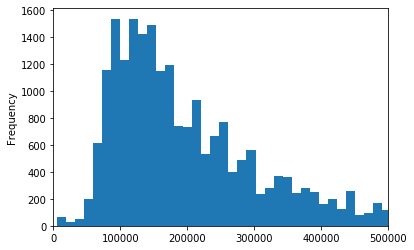

In [105]:
df.precio.plot.hist(bins=1000, xlim=(0,500000))

## Actividad de investigación

Consultar la ayuda o la web para saber más de los métodos que se encuentran a continuación. Por ejemplo:

In [106]:
help(pd.DataFrame.sort_values)

Help on function sort_values in module pandas.core.frame:

sort_values(self, by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False)
    Sort by the values along either axis.
    
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels.
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels.
    
                .. versionchanged:: 0.23.0
    
                   Allow specifying index or column level names.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match the length of
         the by.
 

#### Ordenar valores

* sort_values
* sort_index

#### Tirar filas/columnas

* drop
* drop_duplicates

#### Renombrar filas/columnas

* rename

#### Datos ausentes

* dropna
* fillna

## Recursos adicionales

#### Documentación

* [API](https://pandas.pydata.org/pandas-docs/stable/api.html)

#### Artículos

* [Intro to Pandas](http://gregreda.com/2013/10/26/intro-to-pandas-data-structures/)
* [Modern Pandas](https://tomaugspurger.github.io/modern-1-intro)

#### Machetes

* [DataQuest cheat sheet](https://www.dataquest.io/blog/pandas-cheat-sheet/)
* [DataCamp cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf)
* [Pandas cheat sheet](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

#### Libros

* [Python for data science](https://jakevdp.github.io/PythonDataScienceHandbook/)
* Python for data analysis